# Import Libraries

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_recall_fscore_support, accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.decomposition import PCA

In [3]:
import warnings
warnings.filterwarnings('ignore')

# Evaluation Metrics

In [1]:
# Evaluation metrics for classification model

def evaluate_metric(yt, yp, label):
    metrics = {}
    metrics['Model'] = label
    metrics['Accuracy']= round(accuracy_score(yt, yp), 3)
    precision, recall, f1_score, _ = precision_recall_fscore_support(yt, yp, average='weighted')
    metrics['Precision'] = round(precision, 3)
    metrics['Recall'] = round(recall, 3)
    metrics['F1_score'] = round(f1_score, 3)
    
    return metrics


def plot_confusion_matrix(yt, yp):
    sns.set_context('talk')
    sns.set_style('white')
    cm = confusion_matrix(yt, yp)
    label_names = ['True Negative','False Positive', 'False Negative', 'True Positive']
    label_counts = ['{}'.format(value) for value in cm.flatten()]
    label_percentages = ['{0:.2%}'.format(value) for value in (cm.flatten()/cm.flatten().sum())]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(label_names, label_counts, label_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize=(8,8))
    sns.heatmap(cm, annot=labels, fmt='', annot_kws={'fontweight':'bold', 'size':18})
    plt.xlabel('Predict Value')
    plt.ylabel('True Value')
    plt.title('Confusion Matrix')

# Data Collection

In [4]:
# Read csv file
df = pd.read_csv('aug.csv')

# Data Understanding

In [5]:
# Show the dataframe size
print(df.shape)

(19158, 14)


In [6]:
# First 5 rows of dataframe
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

The target in value 1 mean that the applicant successfully getting hired and in value 0 is vice-versa

# EDA

In [11]:
sns.set_context('talk')
sns.set_style('white')

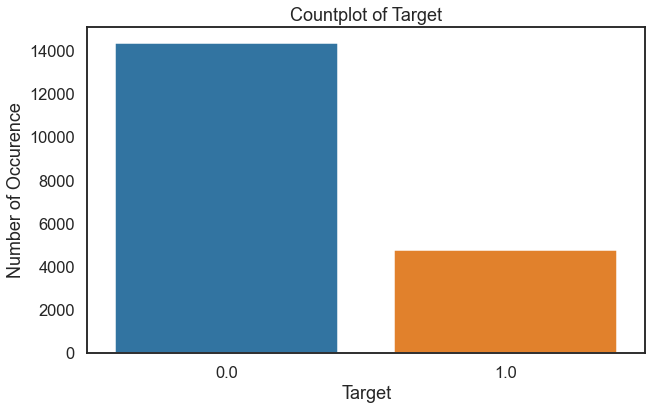

In [21]:
# Boxplot of city development index
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='target') 
plt.xlabel('Target')
plt.ylabel('Number of Occurence')
plt.title('Countplot of Target')
plt.show()

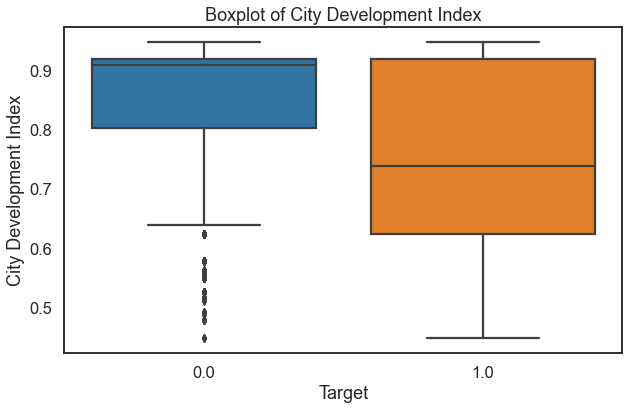

In [20]:
# Boxplot of city development index
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='target', y='city_development_index') 
plt.xlabel('Target')
plt.ylabel('City Development Index')
plt.title('Boxplot of City Development Index')
plt.show()

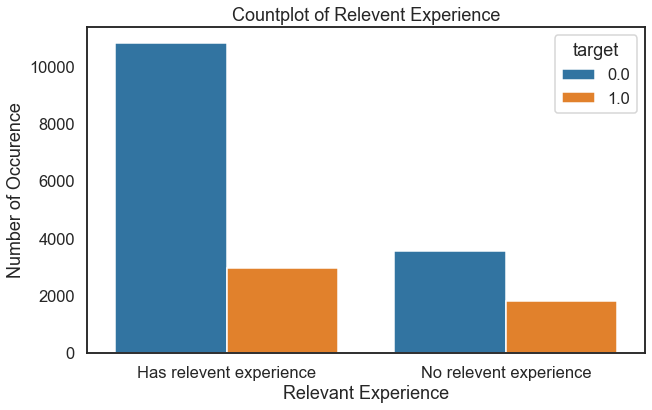

In [24]:
# Countplot of Relevent Experience that categorised by target
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='relevent_experience', hue='target') 
plt.xlabel('Relevant Experience')
plt.ylabel('Number of Occurence')
plt.title('Countplot of Relevent Experience')
plt.show()

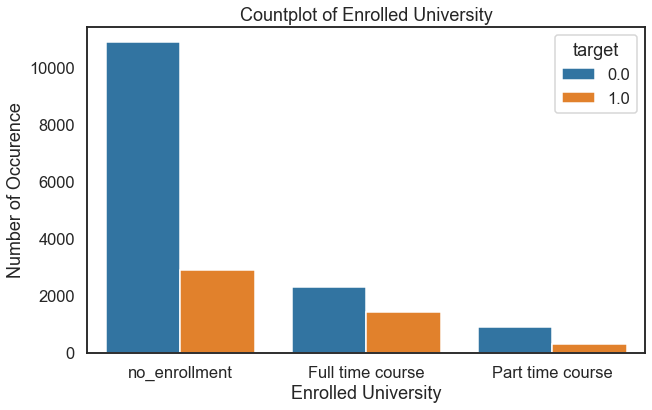

In [25]:
# Countplot of Enrolled University that categorised by target
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='enrolled_university', hue='target')
plt.xlabel('Enrolled University')
plt.ylabel('Number of Occurence')
plt.title('Countplot of Enrolled University')
plt.show()

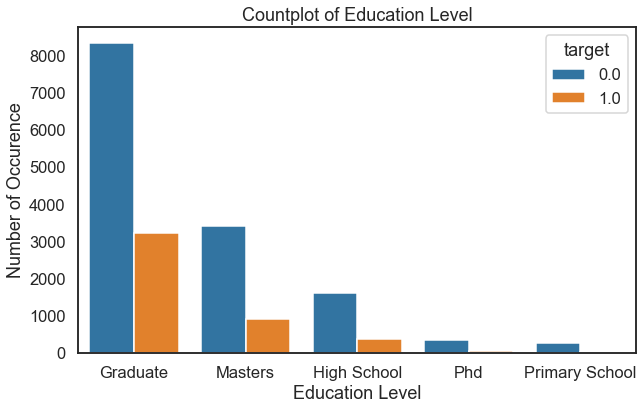

In [26]:
# Countplot of Education Level that categorised by target
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='education_level', hue='target')
plt.xlabel('Education Level')
plt.ylabel('Number of Occurence')
plt.title('Countplot of Education Level')
plt.show()

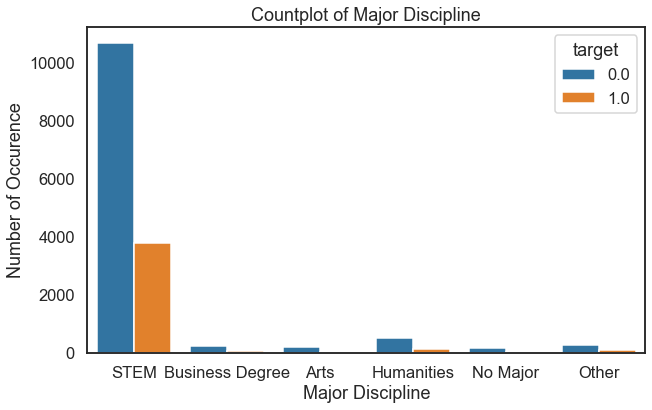

In [27]:
# Countplot of Education Level that categorised by target
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='major_discipline', hue='target')
plt.xlabel('Major Discipline')
plt.ylabel('Number of Occurence')
plt.title('Countplot of Major Discipline')
plt.show()

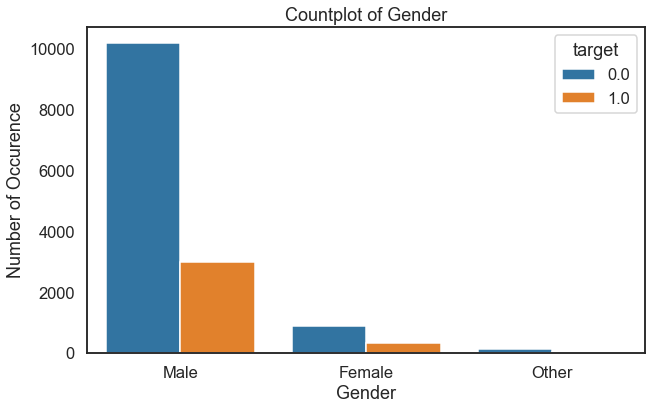

In [28]:
# The distribution of gender for target
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='gender', hue='target')
plt.xlabel('Gender')
plt.ylabel('Number of Occurence')
plt.title('Countplot of Gender')
plt.show()

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

# Data Cleaning & Preprocessing

In [31]:
# Check the amount of NaN in dataframe
df.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [32]:
# Replace the NaN value with preceeding and next values 
df.fillna(method='ffill', inplace=True)
df.fillna(method='bfill', inplace=True)
df.isnull().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

In [33]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,Male,No relevent experience,Full time course,Graduate,STEM,5,50-99,Pvt Ltd,never,83,0.0
3,33241,city_115,0.789,Male,No relevent experience,Full time course,Graduate,Business Degree,<1,50-99,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [34]:
# The 'enrollee_id' and 'city' feature is not important for the analysis, thus we remove both of them from our dataframe.
df.drop(columns=['enrollee_id','city'], inplace=True)
df.head()

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1,36,1.0
1,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,0.624,Male,No relevent experience,Full time course,Graduate,STEM,5,50-99,Pvt Ltd,never,83,0.0
3,0.789,Male,No relevent experience,Full time course,Graduate,Business Degree,<1,50-99,Pvt Ltd,never,52,1.0
4,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [35]:
# Extract the categorical columns from the dataframe for the conversion of categorical values into numerical values.
cat_columns = df.select_dtypes('O').columns.to_list()
cat_columns

['gender',
 'relevent_experience',
 'enrolled_university',
 'education_level',
 'major_discipline',
 'experience',
 'company_size',
 'company_type',
 'last_new_job']

In [36]:
# Convert the categorical values into numerical values with OneHotEncoding
ohe = OneHotEncoder()
ohe.fit(df[cat_columns])
df_ohe_array = ohe.transform(df[cat_columns]).toarray()
df_ohe_array

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 1.],
       ...,
       [0., 1., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [37]:
# Get the features naem from OneHotEncoding.  
feature_ohe = list(ohe.get_feature_names_out(cat_columns))
feature_ohe

['gender_Female',
 'gender_Male',
 'gender_Other',
 'relevent_experience_Has relevent experience',
 'relevent_experience_No relevent experience',
 'enrolled_university_Full time course',
 'enrolled_university_Part time course',
 'enrolled_university_no_enrollment',
 'education_level_Graduate',
 'education_level_High School',
 'education_level_Masters',
 'education_level_Phd',
 'education_level_Primary School',
 'major_discipline_Arts',
 'major_discipline_Business Degree',
 'major_discipline_Humanities',
 'major_discipline_No Major',
 'major_discipline_Other',
 'major_discipline_STEM',
 'experience_1',
 'experience_10',
 'experience_11',
 'experience_12',
 'experience_13',
 'experience_14',
 'experience_15',
 'experience_16',
 'experience_17',
 'experience_18',
 'experience_19',
 'experience_2',
 'experience_20',
 'experience_3',
 'experience_4',
 'experience_5',
 'experience_6',
 'experience_7',
 'experience_8',
 'experience_9',
 'experience_<1',
 'experience_>20',
 'company_size_10/49

In [38]:
# Combine both array and feature to form an OHE dataframe.
df_ohe_array_features = pd.DataFrame(data=df_ohe_array, columns=feature_ohe)
df_ohe_array_features.head()

,gender_Female,gender_Male,gender_Other,relevent_experience_Has relevent experience,relevent_experience_No relevent experience,enrolled_university_Full time course,enrolled_university_Part time course,enrolled_university_no_enrollment,education_level_Graduate,education_level_High School,...,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd,last_new_job_1,last_new_job_2,last_new_job_3,last_new_job_4,last_new_job_>4,last_new_job_never
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [39]:
# The final dataframe after preprocessing
df_ohe = pd.concat([df.drop(columns=cat_columns), df_ohe_array_features], axis=1)
df_ohe.head()

,city_development_index,training_hours,target,gender_Female,gender_Male,gender_Other,relevent_experience_Has relevent experience,relevent_experience_No relevent experience,enrolled_university_Full time course,enrolled_university_Part time course,...,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd,last_new_job_1,last_new_job_2,last_new_job_3,last_new_job_4,last_new_job_>4,last_new_job_never
0,0.920,36,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.776,47,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.624,83,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.789,52,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.767,8,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [40]:
n_cols = list(df_ohe.filter(regex='>|<|[|]'))
n_cols

['experience_<1', 'experience_>20', 'company_size_<10', 'last_new_job_>4']

In [41]:
df_ohe.rename(columns={'experience_<1': 'experience_less_than_1',
                      'experience_>20':'experience_more_than_20',
                      'company_size_<10': 'company_size_less_than_10',
                      'last_new_job_>4': 'last_new_job_more_than_4'}, inplace=True)

# Data Splitting

In [42]:
# Define the feature variable, X and target variable, y
X = df_ohe.drop(columns='target')
y = df_ohe['target']

In [61]:
# Split the data into train and test set.
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42 )

print('Train set size: X: {}, y: {}'.format(X_train.shape, y_train.shape))
print('Test set size: X: {}, y:{}'.format(X_test.shape, y_test.shape))

Train set size: X: (15326, 63), y: (15326,)
Test set size: X: (3832, 63), y:(3832,)


In [62]:
# Dimensionality Reduction using PCA
pca = PCA(n_components=0.99).fit(X_train)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)


print('Train set size: X: {}, y: {}'.format(X_train.shape, y_train.shape))
print('Test set size: X: {}, y:{}'.format(X_test.shape, y_test.shape))

Train set size: X: (15326, 1), y: (15326,)
Test set size: X: (3832, 1), y:(3832,)


# Machine Learning Models

# 1. Model Training (Logistic Regression)

In [63]:
# Train model using Logistic Regression
lr = LogisticRegression()
lr_params = {'penalty': ['l2','l1','elasticnet'],
            'C': [0.1*n for n in range(10)],
            'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']}
lr_cv = GridSearchCV(estimator=lr, param_grid=lr_params, cv=4)
lr_cv.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=LogisticRegression(),
             param_grid={'C': [0.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5,
                               0.6000000000000001, 0.7000000000000001, 0.8,
                               0.9],
                         'penalty': ['l2', 'l1', 'elasticnet'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']})

In [64]:
# Evaluate the metrics of the Logistic Regression Model
lr_yhat = lr_cv.predict(X_test)
lr_metrics = evaluate_metric(y_test, lr_yhat, 'Logistic Regression')
lr_metrics

{'Model': 'Logistic Regression',
 'Accuracy': 0.752,
 'Precision': 0.565,
 'Recall': 0.752,
 'F1_score': 0.645}

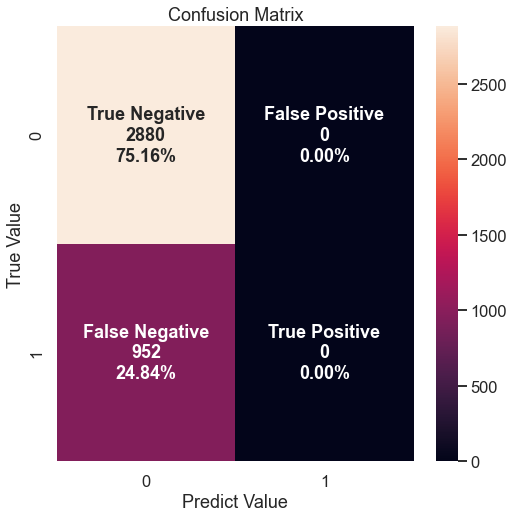

In [65]:
# Confusion matrix of Logistic Regression Model
plot_confusion_matrix(y_test, lr_yhat)

# 2. Model Training (Random Forest Classifier)

In [66]:
# Train model using Random Forest Classifier
rf = RandomForestClassifier()
rf_params= {'criterion': ['gini','entropy','log_loss'],
           'max_depth': [1+n*2 for n in range(5)],
           'n_estimators': [20*n for n in range(1,10)]}
rf_cv = GridSearchCV(rf, rf_params, cv=4)
rf_cv.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 3, 5, 7, 9],
                         'n_estimators': [20, 40, 60, 80, 100, 120, 140, 160,
                                          180]})

In [67]:
# Hyperparamters of Random Forest Classifier
rf_cv.best_params_

{'criterion': 'gini', 'max_depth': 7, 'n_estimators': 20}

In [68]:
# Metrics evaluation of Random Forest Classifier
rf_yhat = rf_cv.predict(X_test)
rf_metrics = evaluate_metric(y_test, rf_yhat, 'Random Forest Classifier')
rf_metrics

{'Model': 'Random Forest Classifier',
 'Accuracy': 0.751,
 'Precision': 0.627,
 'Recall': 0.751,
 'F1_score': 0.645}

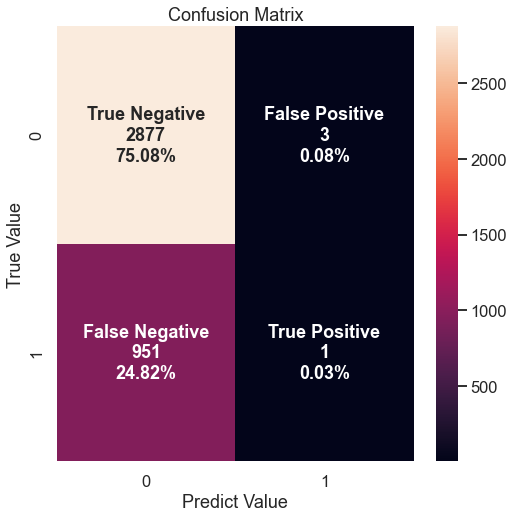

In [69]:
# Confusion matrix
plot_confusion_matrix(y_test, rf_yhat)

# 3. Model Training (XGBoosting Classifier)

In [70]:
xgb = XGBClassifier()
xgb_params = {'learning_rate': [0.1*n+1 for n in range(10)],
              'n_estimators': [20*n for n in range(10)]}
xgb_cv = GridSearchCV(xgb, xgb_params, cv=4)
xgb_cv.fit(X_train, y_train)

GridSearchCV(cv=4,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_ca...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                  

In [71]:
xgb_cv.best_params_

{'learning_rate': 1.0, 'n_estimators': 0}

In [72]:
xgb_yhat = xgb_cv.predict(X_test)
xgb_metrics = evaluate_metric(y_test, xgb_yhat, 'XGBoosting Classifier')
xgb_metrics

{'Model': 'XGBoosting Classifier',
 'Accuracy': 0.752,
 'Precision': 0.565,
 'Recall': 0.752,
 'F1_score': 0.645}

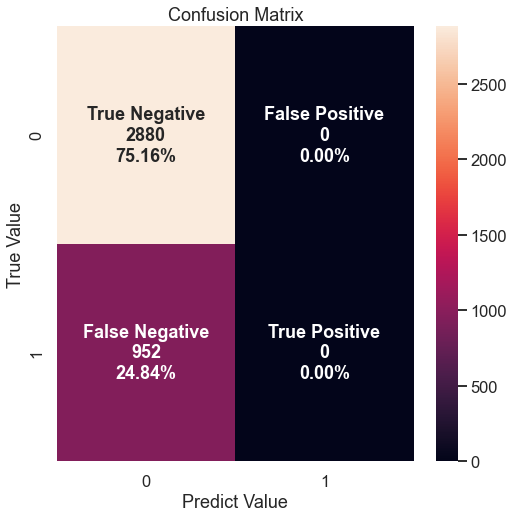

In [73]:
plot_confusion_matrix(y_test, xgb_yhat)

# 4. Model Training (KNearestNeighbors Classifier)

In [74]:
knn = KNeighborsClassifier()
knn_params = {'n_neighbors': [n for n in range(1,15)],
             'weights': ['uniform', 'distance']}
knn_cv = GridSearchCV(knn, knn_params, cv=4)
knn_cv.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14],
                         'weights': ['uniform', 'distance']})

In [75]:
knn_cv.best_params_

{'n_neighbors': 14, 'weights': 'uniform'}

In [76]:
knn_yhat = knn_cv.predict(X_test)
knn_metrics = evaluate_metric(y_test, knn_yhat, 'K-Nearest Neighbors Classifier')
knn_metrics

{'Model': 'K-Nearest Neighbors Classifier',
 'Accuracy': 0.744,
 'Precision': 0.585,
 'Recall': 0.744,
 'F1_score': 0.643}

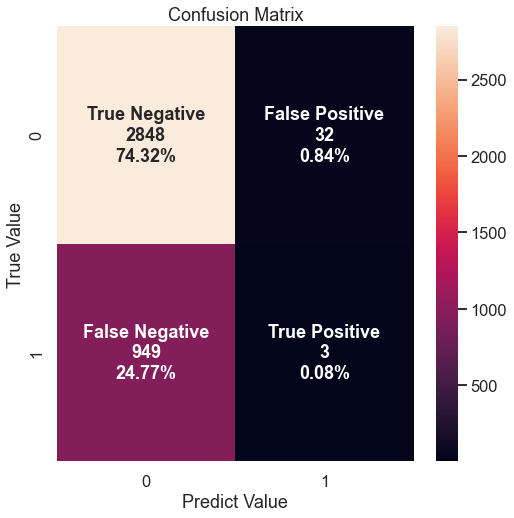

In [77]:
plot_confusion_matrix(y_test, knn_yhat)

# Overview

In [78]:
list_score = [lr_metrics, rf_metrics, xgb_metrics, knn_metrics]
list_score

[{'Model': 'Logistic Regression',
  'Accuracy': 0.752,
  'Precision': 0.565,
  'Recall': 0.752,
  'F1_score': 0.645},
 {'Model': 'Random Forest Classifier',
  'Accuracy': 0.751,
  'Precision': 0.627,
  'Recall': 0.751,
  'F1_score': 0.645},
 {'Model': 'XGBoosting Classifier',
  'Accuracy': 0.752,
  'Precision': 0.565,
  'Recall': 0.752,
  'F1_score': 0.645},
 {'Model': 'K-Nearest Neighbors Classifier',
  'Accuracy': 0.744,
  'Precision': 0.585,
  'Recall': 0.744,
  'F1_score': 0.643}]

In [79]:
pd.DataFrame(list_score).set_index('Model').sort_values('F1_score', ascending=False)

,Accuracy,Precision,Recall,F1_score
Model,,,,
Logistic Regression,0.752,0.565,0.752,0.645
Random Forest Classifier,0.751,0.627,0.751,0.645
XGBoosting Classifier,0.752,0.565,0.752,0.645
K-Nearest Neighbors Classifier,0.744,0.585,0.744,0.643
